''' <br>
Author: Nikhil Patil<br>
Date: 17-11-2024<br>
Last Modified by: Nikhil Patil<br>
Last Modified time: 17-11-2024 <br>
Title: Python program to predict whether client will subscribe to term deposit `Multi Layer Neural Network`<br>

'''


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [3]:
# Suppress specific future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing data

In [4]:
bank_df = pd.read_csv('/content/bank.csv', delimiter=';')
display(bank_df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Display Stats

In [5]:
bank_df.info()
print("\nStats for the dataset are:")
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Stats for the dataset are:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Encoding the data

In [6]:
label_encoder = LabelEncoder()
for column in bank_df.select_dtypes(include=['object']).columns:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])

In [7]:
display(bank_df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


### Data Visualization

### Display Correlation Matrix

In [8]:
correlation_matrix = bank_df.corr()
print(correlation_matrix)

                age       job   marital  education   default   balance  \
age        1.000000 -0.021500 -0.381485  -0.121613 -0.017885  0.083820   
job       -0.021500  1.000000  0.069390   0.170160  0.008324  0.009797   
marital   -0.381485  0.069390  1.000000   0.102714 -0.020745  0.024971   
education -0.121613  0.170160  0.102714   1.000000 -0.010534  0.057725   
default   -0.017885  0.008324 -0.020745  -0.010534  1.000000 -0.070886   
balance    0.083820  0.009797  0.024971   0.057725 -0.070886  1.000000   
housing   -0.193888 -0.128353 -0.029851  -0.087070  0.006881 -0.050227   
loan      -0.011250 -0.040245 -0.045210  -0.054086  0.063994 -0.071349   
contact    0.015161 -0.074068 -0.068236  -0.110554  0.008448 -0.009665   
day       -0.017853  0.012865  0.008794   0.014926 -0.013261 -0.008677   
month     -0.040714 -0.096613 -0.035855  -0.050086  0.014297  0.023113   
duration  -0.002367 -0.006739  0.006619  -0.014878 -0.011615 -0.015950   
campaign  -0.005148 -0.002739  0.00591

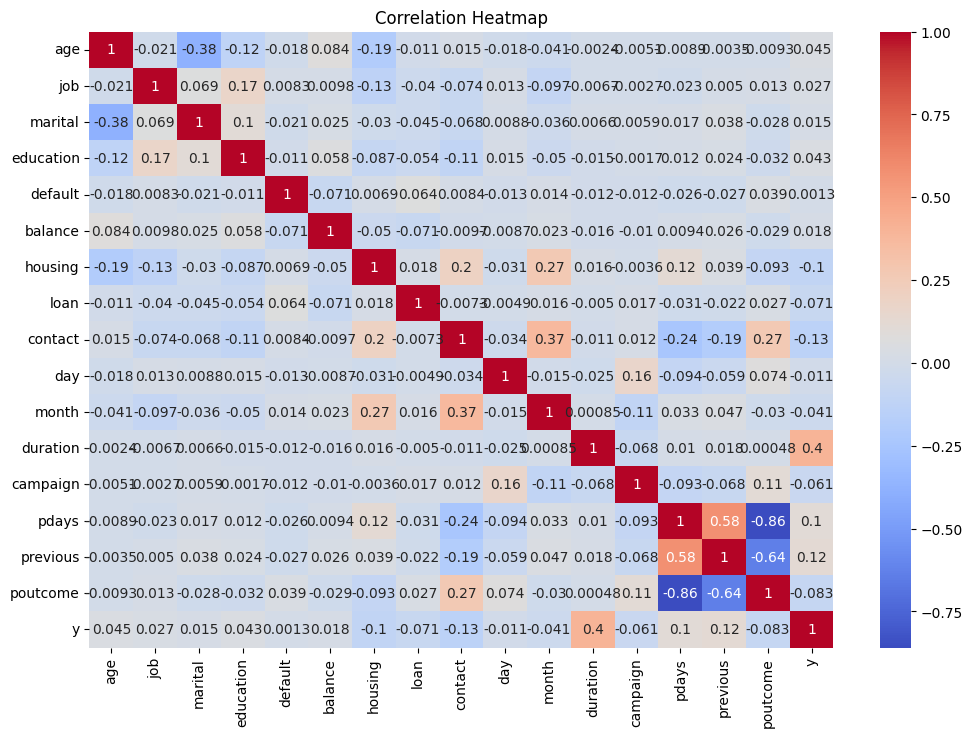

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Training

**Define Features and Target**

In [10]:
X = bank_df.drop('y', axis = 1)
y = bank_df['y']

**Split the dataset into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
feature_names = X.columns

**Feature scaling using StandardScaler**

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
y_train_binary = np.where(y_train == 1, 1, 0)
y_test_binary = np.where(y_test == 1, 1, 0)

**Fit the model**

In [15]:
# Create a Multi-Layer Neural Network model
model = Sequential()

# Input layer and first hidden layer (with 16 neurons and ReLU activation)
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer (with 8 neurons and ReLU activation)
model.add(Dense(8, activation='relu'))

# Output layer (with 1 neuron and sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Train the model
model.fit(X_train_scaled, y_train_binary, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6728 - loss: 0.6150
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8960 - loss: 0.3563
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8843 - loss: 0.3041
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8839 - loss: 0.2898
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8943 - loss: 0.2575
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8974 - loss: 0.2557
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8932 - loss: 0.2735
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.2742
Epoch 9/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8973 - loss: 0.2406
Epoch 10/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9035 - loss: 0.2312
Epoch 11/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9020 - loss: 0.2443
Epoch 12/100
106/106 ━━━━━━━━━━━━━━━━━━━━

**Displaying Metrics**

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_binary, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.3f}')

Test Accuracy: 88.42%
Test Loss: 0.309


**Predicting the test results**

In [19]:
predictions = model.predict(X_test_scaled)
predictions_binary = np.where(predictions > 0.5, 1, 0)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


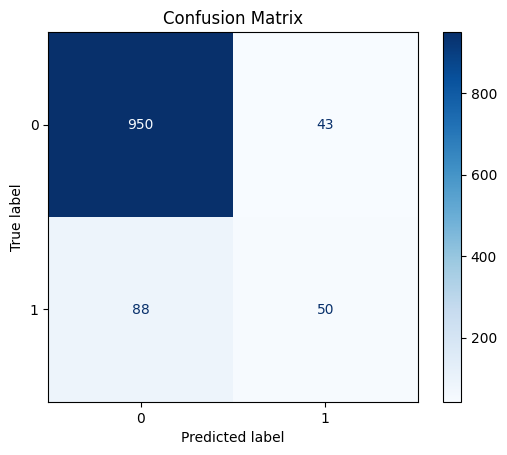

In [20]:
# Create confusion matrix
cm = confusion_matrix(y_test_binary, predictions_binary)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

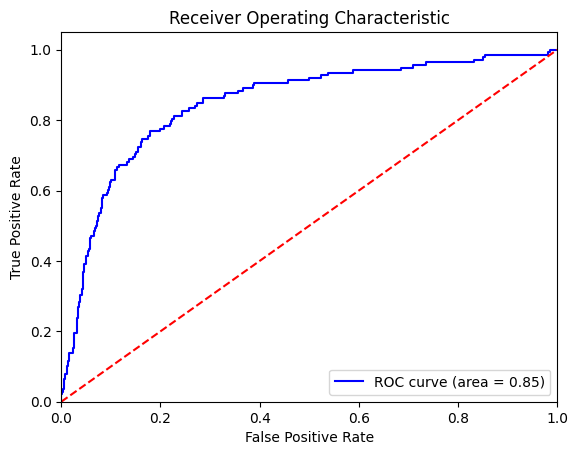

In [ ]:


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()